## Linear Regression

---


In [17]:
from os import sys

sys.path.append(".../udamini/tools/")

Starter code for the regression mini-project.

Loads up/formats a modified version of the dataset

- why modified?  we've removed some trouble points that you'll find yourself in the outliers mini-project

- Draws a little scatterplot of the training/testing data

- You fill in the regression code where indicated:

In [18]:
import sys
import pickle
sys.path.append("c:/pyprog/udamini/tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("c:/pyprog/udamini/final_project/final_project_dataset_modified.pkl", "r") )

List the features you want to look at

- the **input** feature $\rightarrow$ **salary**
 
 - will be the **second** item in the list

- the **target** feature $\rightarrow$ **bonus**
 
 - will be the **first** item in the list
 
*eu quero entrar **salário** para ver se eu encontro **bônus**!*

Na verdade, eu rodo toda a regressão duas vezes:

 - uma **salário** vs **bônus** e meus dados da regressão não são tão favoráveis assim
 
 - a segunda, **long term incentive** vs **bônus** e eu percebo que minha regressão se encaixa melhor!
 
*basta setar a linha comentada e rodar tudo de novo para verificar*

In [38]:
features_list = ["bonus", "salary"]
#features_list = ["bonus", "long_term_incentive"]
print (features_list)
data = featureFormat(dictionary, features_list, remove_any_zeroes=True)
#print (data)
target, features = targetFeatureSplit(data)

['bonus', 'salary']


Training-testing split needed in regression, just like classification 

In [39]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "r"
test_color = "b"

Your regression goes here!

Please name it reg, so that the plotting code below picks it up and plots it correctly. Don't forget to change the test_color above from "b" to "r" to differentiate training points from test points.

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg = LinearRegression()

reg.fit(feature_train,target_train)
print "Slope:", reg.coef_
print "Intercept:", reg.intercept_
print "Score Training:", reg.score(feature_train, target_train)
print "Score Testing:", reg.score(feature_test, target_test)

Slope: [5.44814029]
Intercept: -102360.54329387983
Score Training: 0.04550919269952436
Score Testing: -1.48499241736851


Draw the scatterplot, with color-coded training and testing points

In [42]:
import matplotlib.pyplot as plt

Slope: [2.27410114]
Intercept: 124444.38886605436


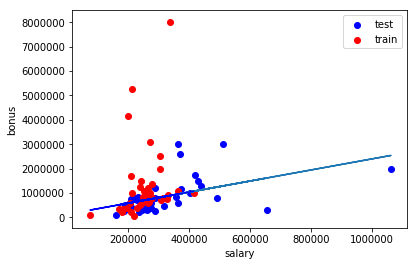

In [44]:
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

### essas duas linhas extras removem os outliers (para resolver a última questão!)
#reg.fit(feature_test, target_test)
#plt.plot(feature_train, reg.predict(feature_train), color="b")
#print "Slope:", reg.coef_
#print "Intercept:", reg.intercept_
    
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

---

A python dictionary can’t be read directly into an sklearn **classification** or **regression** algorithm

- instead, it needs a numpy array or a list of lists

 - each element of the list (itself a list) is a data point, and
 
 - the elements of the smaller list are the features of that point

We’ve written some helper functions in tools/feature_format.py that can

- take a list of feature names and the data dictionary

- return a numpy array

 - **featureFormat()**

 - **targetFeatureSplit()**

In the case when a feature does not have a value for a particular person

 - this function will also **replace** the feature value with 0 (zero)

---

In regression, you need training and testing data, just like in classification. This has already been set up in the starter code. Change the value of test_color from "b" to “r” (for “red”), and rerun

*Note: For those students converting Python 2 code to Python 3, see below for some important remarks regarding compatibility*

You will be fitting your regression using the blue (training) points only. (You may have noticed that instead of the standard 10%, we’ve put 50% of our data into the test set--that’s because in Part 5, we will switch the training and testing datasets around and splitting the data evenly makes this more straightforward)

From Python 3.3 forward, a change to the order in which dictionary keys are processed was made such that the orders are randomized each time the code is run. This will cause some compatibility problems with the graders and project code, which were run under Python 2.7. To correct for this, add the following argument to the featureFormat call on line 26 of **finance_regression.py**:

        sort_keys = '../tools/python2_lesson06_keys.pkl'

This will open up a file in the tools folder with the Python 2 key order

---

This is a sneak peek of the next lesson, on **outlier identification and removal**. Go back to a setup where you are using the salary to predict the bonus, and rerun the code to remind yourself of what the data look like. You might notice a few data points that fall outside the main trend, someone who gets a high salary (over a million dollars!) but a relatively small bonus. This is an example of an outlier, and we’ll spend lots of time on them in the next lesson

A point like this can have a big effect on a regression:

- if it falls in the training set, it can have a significant effect on the slope/intercept if it falls in the test set, it can make the score much lower than it would otherwise be

As things stand right now, this point falls into the test set (and probably hurting the score on our test data as a result)

Let’s add a little hack to see what happens if it falls in the training set instead. Add these two lines near the bottom of finance_regression.py, right before plt.xlabel(features_list[1]):

    reg.fit(feature_test, target_test)

    plt.plot(feature_train, reg.predict(feature_train), color="b") 

Now we’ll be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier). Look at the plot now--big difference, huh? That single outlier is driving most of the difference. What’s the slope of the new regression line?

(That’s a big difference, and it’s mostly driven by the outliers. The next lesson will dig into outliers in more detail so you have tools to detect and deal with them

---

*Note: If you are not getting the results expected by the grader, then you may want to check the file tools/feature_format.py. Due to changes in the final project, some file changes have affected the numbers output on this assignment as written. Check that you have the most recent version of the file from the repository, such that the featureFormat has a default parameter for sort_keys = False and that keys = dictionary.keys() results. There should also be a test_list variable that is used to filter missing data*